# Introduction to Statistics

## 1: Introduction To Scales

A scale represents the possible values that a variable can have.

In [1]:
# Load packages
# For graphs
import matplotlib.pyplot as plt
% matplotlib inline
# For statistics
import scipy.stats as stats
import scipy
# For data analysis
import numpy as np
import pandas as pd
# Random numbers
import random

from __future__ import division
import math

In [1]:
car_speeds = [10,20,30,50,20]
mean_car_speed = sum(car_speeds) / len(car_speeds)
mean_car_speed

26

## 2: Discrete And Continuous Scales

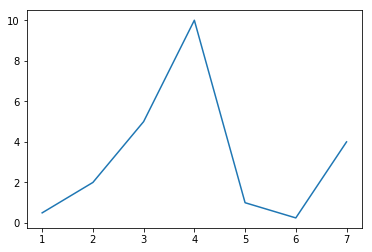

In [2]:
day_numbers = [1,2,3,4,5,6,7]
snail_crawl_length = [.5,2,5,10,1,.25,4]

plt.plot(day_numbers, snail_crawl_length)
plt.show()

## 4: Working With Ordinal Scales

Map 0 to "none," 1 to "a few," 2 to "some," and so on.

In [3]:
survey_responses = ["none", "some", "a lot", "none", "a few", "none", "none"]
survey_scale = ["none", "a few", "some", "a lot"]
survey_number = [survey_scale.index(response) for response in survey_responses]
survey_number

[0, 2, 3, 0, 1, 0, 0]

In [4]:
average_smoking = sum(survey_number) / len(survey_number)

## 5: Grouping Values With Categorical Scales

We can also have categorical scales, which group values into general categories.

One example is *gender*, which can be *male* or *female*.

In [5]:
gender = ["male", "female", "female", "male", "male", "female"]
savings = [1200, 5000, 3400, 2400, 2800, 4100]

In [6]:
male_savings_list = [savings[i] for i in range(0,len(gender)) if gender[i]=="male"]
female_savings_list = [savings[i] for i in range(0,len(gender)) if gender[i]=="female"]
male_savings = sum(male_savings_list) / len(male_savings_list)
male_savings

2133

## 6: Visualizing Counts With Frequency Histograms

**Frequency histograms** give us a better understanding of where values fall within a data set.

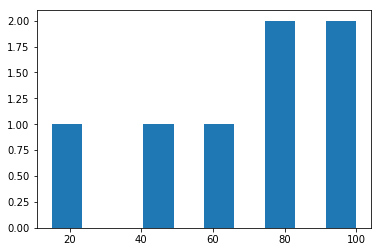

In [7]:
student_scores = [15, 80, 95, 100, 45, 75, 65]
plt.hist(student_scores)
plt.show()

## 7: Aggregating Values With Histogram Bins

We'd like to point something out about what you saw on the previous screen. *matplotlib*'s default number of *bins* for a plot is 10. We had fewer values than that, so *matplotlib* displayed all of the values.

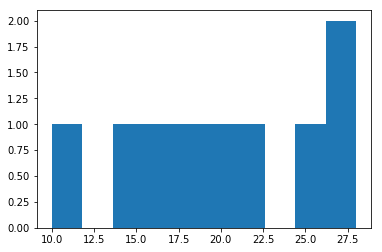

In [8]:
average_speed = [10, 20, 25, 27, 28, 22, 15, 18, 17]
plt.hist(average_speed)
plt.show()

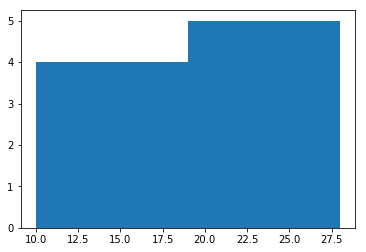

In [9]:
plt.hist(average_speed, bins=2)
plt.show()

## 8: Measuring Data Skew

In [10]:
scores_skew = stats.skew(student_scores)
scores_skew

-0.7165018793329461

## 9: Checking For Outliers With Kurtosis

In [11]:
kurt = stats.kurtosis(student_scores)
kurt

-0.5729127396504339

## 10: Modality

*Modality* refers to the number of modes, or peaks, in a distribution.

## 11: Measures Of Central Tendency

Central tendency measures assess how likely the data points are to cluster around a central value.

## 14: Removing Missing Data

Not all of the data is available; details such as age are missing for some passengers. Before we can analyze the data, we have to do something about the missing rows.

The easiest way to address them is to just remove all of the rows with missing data. This isn't necessarily the best solution in all cases, but we'll learn about other ways to handle these situations later on.

In [14]:
f = "titanic_survival.csv"
titanic_survival = pd.read_csv(f)
print(titanic_survival.shape) # look at how large the DataFrame is first

(1310, 14)


In [15]:
new_titanic_survival = titanic_survival.dropna(subset=["age","sex"])

## 15: Plotting Age

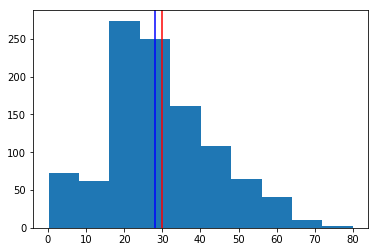

In [19]:
plt.hist(new_titanic_survival["age"])
plt.axvline(np.median(new_titanic_survival["age"]), color = "b")
plt.axvline(new_titanic_survival["age"].mean(), color = "r")
plt.show()

## 16: Calculating Indexes For Age

Now that we know what the distribution looks like, let's calculate its characteristics and central tendency measures.

In [21]:
mean_age = new_titanic_survival["age"].mean()
median_age = np.median(new_titanic_survival["age"])
skew_age = stats.skew(new_titanic_survival["age"])
kurtosis_age = stats.kurtosis(new_titanic_survival["age"])
print mean_age, median_age, skew_age, kurtosis_age

29.8811345124 28.0 0.407087037948 0.140517802994


# Standard Deviation and Correlation

## 2: The Mean As The Center

If we subtract the mean of a set of numbers from each of the numbers within that set, the overall total of all of the differences will always add up to zero.

In [25]:
values = [2, 4, 5, -1, 0, 10, 8, 9]
values_mean = sum(values) / len(values)
differences = [i - values_mean for i in values]
print(sum(differences)) # float problem

5


## 3: Finding Variance

In [3]:
nba_stats = pd.read_csv("nba_2013.csv")
nba_stats.head(5)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [9]:
pf_mean = nba_stats["pf"].mean()
variance = 0
for p in nba_stats["pf"]:
    difference = p - pf_mean
    square_difference = difference ** 2
    variance += square_difference
variance = variance / len(nba_stats["pf"])

variance

5060.8373148456349

## 7: Calculating Standard Deviation

In [13]:
def calc_column_deviation(column):
    mean = column.mean()
    variance = 0
    for p in column:
        difference = p - mean
        square_difference = difference ** 2
        variance += square_difference
    variance = variance / len(column)
    return variance ** (0.5)

calc_column_deviation(nba_stats["pf"])

71.13956223400335

## 8: Finding Standard Deviation Distance

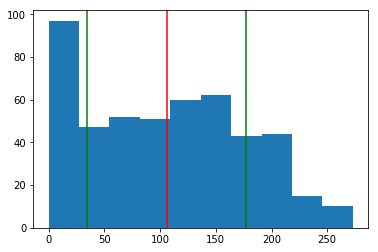

In [14]:
plt.hist(nba_stats["pf"])
mean = nba_stats["pf"].mean()
plt.axvline(mean, color="r")
std_dev = nba_stats["pf"].std() # We can calculate standard deviation by using the std() method on a pandas series.
plt.axvline(mean - std_dev, color="g")
plt.axvline(mean + std_dev, color="g")
plt.show()

In [18]:
QA_total_distance = nba_stats["pf"][0] - mean
QA_standard_deviation_distance = QA_total_distance / std_dev

## 9: Working With The Normal Distribution

We can generate a normal distribution by using a **probability density function**.

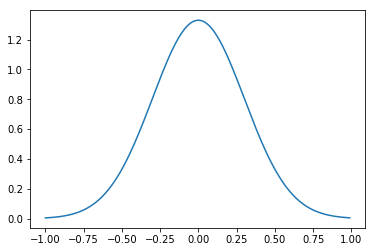

In [19]:
# The norm module has a pdf function (pdf stands for probability density function)
from scipy.stats import norm
points = np.arange(-1, 1, 0.01)
# The norm.pdf function will take the points vector and convert it into a probability vector
# The distribution will be centered on 0, and will have a standard devation of .3
probabilities = norm.pdf(points, 0, .3)

plt.plot(points, probabilities)
plt.show()

## 10: Normal Distribution Deviation

About 68% of the data is within one standard deviation, roughly 95% is within two standard deviations, and about 99% is within three standard deviations.

In [24]:
wing_lengths = [36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55]
mean = sum(wing_lengths) / len(wing_lengths)
square_difference = [(i - mean) ** 2 for i in wing_lengths]
variance = sum(square_difference) / len(wing_lengths)
standard_deviation = variance ** (0.5)
standard_deviations = [(i - mean) / standard_deviation for i in wing_lengths]

def within_percentage(deviations, count):
    within = [i for i in deviations if i <= count and i >= -count]
    return len(within) / len(wing_lengths)

print within_percentage(standard_deviations, 1), within_percentage(standard_deviations, 2), within_percentage(standard_deviations, 3)

0 0 1


## 11: Using Scatterplots To Plot Correlations

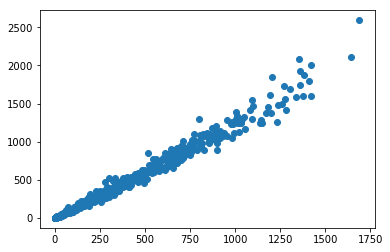

In [25]:
plt.scatter(nba_stats["fga"], nba_stats["pts"])
plt.show()

## 12: Measuring Correlation With Pearson's R

The most common way to measure correlation is to use **Pearson's r**, which we also call an **r-value**.

In [31]:
r, p_value = stats.pearsonr(nba_stats["fga"], nba_stats["pts"])
print r, p_value

0.989211400652 0.0


## 14: Calculate Correlation With The Std() Method

In [33]:
np.cov(nba_stats["fga"], nba_stats["pts"])[0,1] / ((nba_stats["fga"].var() * nba_stats["pts"].var())** (0.5))

0.98921140065216306

# Challenge: Descriptive Statistics

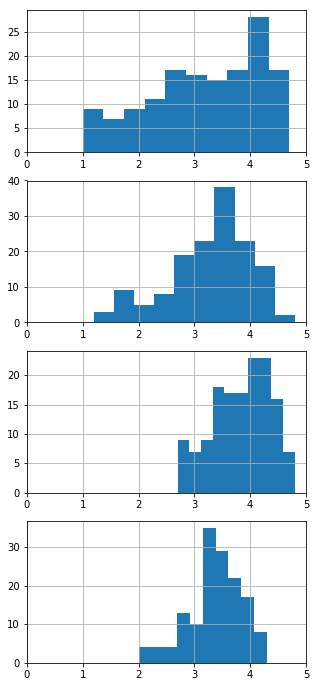

In [2]:
movie_reviews = pd.read_csv("fandango_score_comparison.csv")
fig = plt.figure(figsize=(5,12))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)
ax4.set_xlim(0,5.0)

movie_reviews["RT_user_norm"].hist(ax=ax1)
movie_reviews["Metacritic_user_nom"].hist(ax=ax2)
movie_reviews["Fandango_Ratingvalue"].hist(ax=ax3)
movie_reviews["IMDB_norm"].hist(ax=ax4)

## 2: Mean

In [6]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

columns = ["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]
user_reviews = movie_reviews[columns]
user_reviews_means = user_reviews.apply(calc_mean)

rt_mean = user_reviews_means["RT_user_norm"]
mc_mean = user_reviews_means["Metacritic_user_nom"]
fg_mean = user_reviews_means["Fandango_Ratingvalue"]
id_mean = user_reviews_means["IMDB_norm"]

user_reviews_means

RT_user_norm            3.193836
Metacritic_user_nom     3.259589
Fandango_Ratingvalue    3.845205
IMDB_norm               3.368493
dtype: float64

## 3: Variance And Standard Deviation

In [9]:
def calc_variance(series):
    mean = calc_mean(series)
    squared_deviations = (series - mean) ** 2
    mean_squared_deviations = calc_mean(squared_deviations)
    return mean_squared_deviations

user_reviews_variances = user_reviews.apply(calc_variance)
user_reviews_variances

RT_user_norm            0.995578
Metacritic_user_nom     0.566655
Fandango_Ratingvalue    0.251107
IMDB_norm               0.228220
dtype: float64

## 4: Scatter Plots

Are movies that are highly rated on Rotten Tomatoes, IMDB, and Metacritic also highly rated on Fandango?

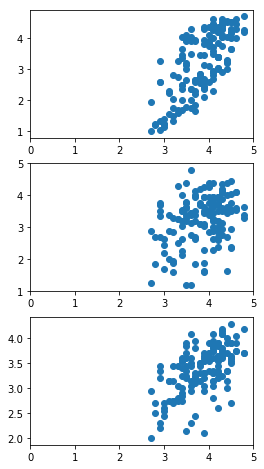

In [10]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)

ax1.scatter(movie_reviews["Fandango_Ratingvalue"],movie_reviews["RT_user_norm"])
ax2.scatter(movie_reviews["Fandango_Ratingvalue"],movie_reviews["Metacritic_user_nom"])
ax3.scatter(movie_reviews["Fandango_Ratingvalue"],movie_reviews["IMDB_norm"])

## 5: Covariance

It seems like Rotten Tomatoes and IMDB user reviews correlate the most with Fandango user reviews while Metacritic only weakly correlates. Let's write a function that to calculates the covariance values.

In [11]:
def calc_covariance(series_one, series_two):
    x = series_one.values
    y = series_two.values
    x_mean = calc_mean(series_one)
    y_mean = calc_mean(series_one)
    x_diffs = [i - x_mean for i in x]
    y_diffs = [i - y_mean for i in y]
    codeviates = [x_diffs[i]*y_diffs[i] for i in range(len(x))]
    return sum(codeviates) / len(codeviates)

rt_fg_covar = calc_covariance(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_covar = calc_covariance(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_covar = calc_covariance(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

print("Covariance between Rotten Tomatoes and Fandango:", rt_fg_covar)
print("Covariance between Metacritic and Fandango", mc_fg_covar)
print("Covariance between IMDB and Fandango", id_fg_covar)

('Covariance between Rotten Tomatoes and Fandango:', 0.36216222555826522)
('Covariance between Metacritic and Fandango', 0.12710076937511833)
('Covariance between IMDB and Fandango', 0.14371880277725646)


## 6: Correlation

In [13]:
def calc_correlation(series_one, series_two):
    return calc_covariance(series_one, series_two) / (calc_variance(series_one)*calc_variance(series_two))**(0.5)

rt_fg_corr = calc_correlation(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_corr = calc_correlation(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_corr = calc_correlation(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

print("Correlation between Rotten Tomatoes and Fandango", rt_fg_corr)
print("Correlation between Metacritic and Fandango", mc_fg_corr)
print("Correlation between IMDB and Fandango", id_fg_corr)

('Correlation between Rotten Tomatoes and Fandango', 0.72432899424931263)
('Correlation between Metacritic and Fandango', 0.33694531426495111)
('Correlation between IMDB and Fandango', 0.60035417726263551)


# Linear regression

## 2: Drawing Lines

A simple line is y=x. This means that the value of a point on the y-axis is the same as the corresponding value on the x-axis.

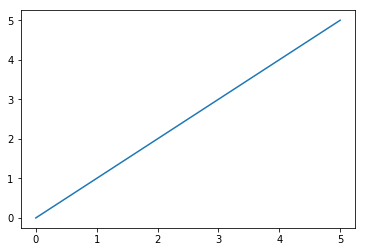

In [16]:
x = [0, 1, 2, 3, 4, 5]
y = x
plt.plot(x,y)
plt.show()

## 3: Working With Slope

In [19]:
x = [0, 1, 2, 3, 4, 5]
y = 2 * x
y

[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]

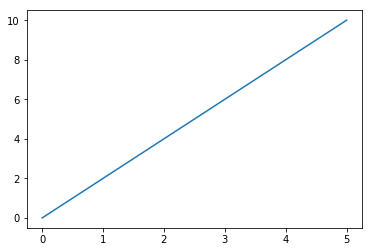

In [20]:
x = np.asarray([0, 1, 2, 3, 4, 5])
y = 2 * x
plt.plot(x, y)
plt.show()

## 4: Starting Out With Linear Regression

We'll calculate slope first -- the formula is cov(x,y)σx2, which is just the covariance of x and y divided by the variance of x.

We can use the `cov` function to calculate covariance, and the `.var()` method on Pandas series to calculate variance.

In [22]:
wine_quality = pd.read_csv("wine_quality_white.csv")
slope_density = np.cov(wine_quality["density"], wine_quality["quality"])[0,1] / wine_quality["density"].var()
slope_density

-90.942399942137811

## 5: Finishing Linear Regression

We can compute the intercept by taking the slope we calculated and doing this: y¯−mx¯. 

Remember that we can calculate the mean by using the `.mean()` method.

In [24]:
intercept_density = wine_quality["quality"].mean() - (slope_density * wine_quality["density"].mean())
intercept_density

96.277144576050816

## 6: Making Predictions

Depending on how correlated the predictor and the value being predicted are, the predictions may be good or bad.

Let's look at making predictions now, and we'll move on to figuring out how good they are.

In [25]:
def calc_slope(x, y):
    return np.cov(x,y) / x.var()

def calc_intercept(x, y, slope):
    return y.mean() - (slope * x.mean())

slope = calc_slope(wine_quality["density"], wine_quality["quality"])
intercept = calc_intercept(wine_quality["density"], wine_quality["quality"], slope)

def compute_predicted_y(x):
    return slope * x + intercept

predicted_quality = wine_quality["density"].apply(compute_predicted_y)

## 7: Finding Error

The `linregress` function from *scipy* makes it simple to do linear regression.

In [26]:
slope, intercept, r_value, p_value, stderr_slope = stats.linregress(wine_quality["density"], wine_quality["quality"])

print(slope)
print(intercept)

predicted_y = np.asarray([slope * x + intercept for x in wine_quality["density"]])
residuals = (wine_quality["quality"] - predicted_y) ** 2
rss = sum(residuals)

-90.9423999421
96.2771445761


## 8: Standard Error

The equation for standard error is RSSn−2.

You take the sum of squared residuals, divide by the number of y-points minus two, and then take the square root.

In [28]:
stderr = (rss / (len(wine_quality["quality"]) - 2)) ** .5

def within_percentage(y, predicted_y, stderr, error_count):
    within = stderr * error_count
    difference = abs(predicted_y - y)
    lower_differences = [d for d in difference if d <= within]
    within_count = len(lower_differences)
    return within_count / len(y)

within_one = within_percentage(wine_quality["quality"], predicted_y, stderr, 1)
within_two = within_percentage(wine_quality["quality"], predicted_y, stderr, 2)
within_three = within_percentage(wine_quality["quality"], predicted_y, stderr, 3)

# Distributions and sampling

## 1: Exploring The Data

### Instructions

- Find the county with the lowest median income in the US (`median_income`). Assign the name of the county (`county`) to `lowest_income_county`.
- Find the county that has more than `500000` residents with the lowest median income. Assign the name of the county to `lowest_income_high_pop_county`.

In [34]:
income = pd.read_csv("us_income.csv")
print(income.head(2))

     id                   county  pop_over_25  median_income  \
0  1001  Autauga County, Alabama        35696          34581   
1  1003  Baldwin County, Alabama       130063          31352   

   median_income_no_hs  median_income_hs  median_income_some_college  \
0                17946             30157                       33225   
1                17474             25242                       30922   

   median_income_college  median_income_graduate_degree  
0                  53248                          68125  
1                  46017                          55933  


In [33]:
lowest_income_county = income["county"][income["median_income"].idxmin()]

high_pop = income[income["pop_over_25"] > 500000]
lowest_income_high_pop_county = high_pop["county"][high_pop["median_income"].idxmin()]

print lowest_income_county, lowest_income_high_pop_county

Starr County, Texas Miami-Dade County, Florida


## 2: Random Numbers

Sometimes, instead of looking at a whole dataset, you just want to take a sample of it.

The ACS randomly samples all of the addresses in the US, and picks about 1 in every 40 to participate.

Let's look at how we can generate a random sample. The first step is to generate random numbers. We can use the `random` package in Python to do this for us.

In [36]:
# Returns a random integer between the numbers 0 and 10, inclusive.
random.randint(0,10)

4

In [37]:
# Generate a sequence of 10 random numbers between the values of 0 and 10.
[random.randint(0,10) for _ in range(10)]

[4, 7, 7, 1, 1, 2, 6, 3, 7, 8]

In [38]:
# Sometimes, when we generate a random sequence, we want it to be the same sequence whenever the program is run.
# We can ensure this by setting a random seed.
# A random seed is an integer that is used to "seed" a random number generator.
# After a random seed is set, the numbers generated after will follow the same sequence.
random.seed(10)
print([random.randint(0,10) for _ in range(5)])

[6, 4, 6, 2, 8]


In [39]:
random.seed(10)
# Same sequence as above.
print([random.randint(0,10) for _ in range(5)])

[6, 4, 6, 2, 8]


In [40]:
random.seed(11)
# Different seed means different sequence.
print([random.randint(0,10) for _ in range(5)])

[4, 6, 10, 5, 5]


## 3: Selecting Items From A List

When we do sampling, we usually want to select a certain number of items from a list. There are a few ways to do this.

The easiest way is to use the `random.sample` method to select a specified number of items from a list.

## 4: Population Vs Sample


### Instructions

- Set the random seed to `1`, then generate a medium sample of `100` die rolls. Plot the result using a histogram with 6 bins.
- Set the random seed to `1`, then generate a large sample of `10000` die rolls. Plot the result using a histogram with 6 bins.

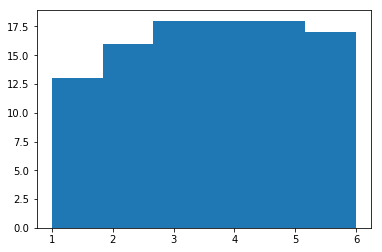

In [42]:
def roll():
    return random.randint(1,6)

random.seed(1)
small_sample = [roll() for _ in range(100)]

plt.hist(small_sample, bins=6)
plt.show()

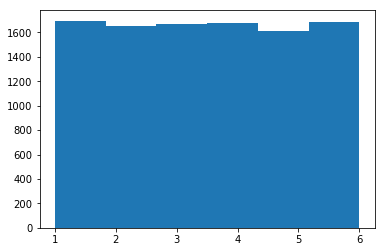

In [43]:
random.seed(1)
large_sample = [roll() for _ in range(10000)]

plt.hist(large_sample, bins=6)
plt.show()

## 5: Finding The Right Sample Size

### Instructions

- Set the random seed to `1`, then generate probabilities for `300` trials of `100` die rolls each. Make a histogram with `20`bins.
- Set the random seed to `1`, then generate probabilities for `300` trials of `1000` die rolls each. Make a histogram with `20` bins.

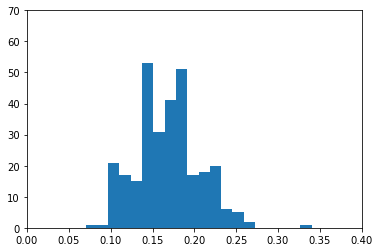

In [50]:
def probability_of_one(num_trials, num_rolls):
    """
    This function will take in the number of trials, and the number of rolls per trial.
    Then it will conduct each trial, and record the probability of rolling a one.
    """
    probabilities = []
    for i in range(num_trials):
        die_rolls = [roll() for _ in range(num_rolls)]
        one_prob = len([d for d in die_rolls if d==1]) / float(num_rolls)
        probabilities.append(one_prob)
    return probabilities

random.seed(1)
small_sample = probability_of_one(300, 100)
plt.hist(small_sample, bins=20)
plt.ylim(0,70)
plt.xlim(0,0.4)
plt.show()

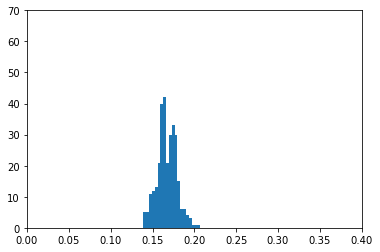

In [51]:
random.seed(1)
large_sample = probability_of_one(300, 1000)
plt.hist(large_sample, 20)
plt.ylim(0,70)
plt.xlim(0,0.4)
plt.show()

## 7: Sampling Counties

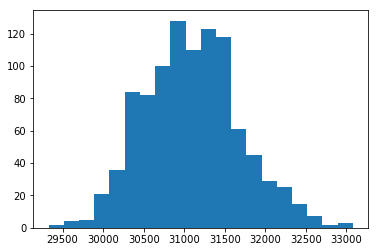

In [57]:
def select_random_sample(count):
    # randomly choose "count" numbers from 0 to "rows"
    random_indices = random.sample(range(0, income.shape[0]), count)
    return income.iloc[random_indices]

random.seed(1)
random_sample = [select_random_sample(100)["median_income"].mean() for _ in range(1000)]
plt.hist(random_sample, 20)
plt.show()

## 8: An Experiment

We want to see whether a certain kind of adult education can help high school graduates earn more relative to college graduates than they could otherwise.

We decide to trial our program in `100`counties.

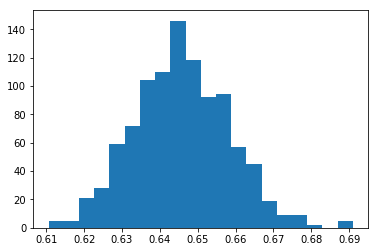

In [58]:
random.seed(1)
mean_ratios = []
for i in range(1000):
    sample = select_random_sample(100)
    ratios = sample["median_income_hs"] / sample["median_income_college"]
    mean_ratios.append(ratios.mean())

plt.hist(mean_ratios, 20)
plt.show()

## 9: Statistical Significance

In [63]:
significance_value = None # ?
mean_higher = len([m for m in mean_ratios if m >= .675])
significance_value = mean_higher / len(mean_ratios)

## 10: Final Result

Our significance value was `.014`. Based on the entire population, only 1.4% of the time will the wage results we saw have occurred on their own. 

# Introduction to probability

## 1: Probability Basics

In [2]:
flags = pd.read_csv("flags.csv")
flags.head(2)

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red


In [73]:
most_bars_country = flags["name"][flags["bars"].idxmax()]
highest_population_country = flags["name"][flags["population"].idxmax()]
most_bars_country, highest_population_country

('St-Vincent', 'China')

## 2: Calculating Probability

- Determine the probability of a country having a flag with the color orange in it. Assign the result to `orange_probability`.

In [3]:
orange_probability = flags[flags["orange"] == 1].shape[0] / flags.shape[0]
orange_probability

0.13402061855670103

# Calculating probabilities

## 2: Probability Of Renting Bikes

- Find the probability that more than `4000` bikes were rented on any given day.

In [4]:
bikes = pd.read_csv("bike_rental_day.csv")
bikes.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [6]:
probability_over_4000 = bikes[bikes["cnt"] > 4000].shape[0] / bikes.shape[0]
probability_over_4000

0.6183310533515732

## 8: Finding The Number Of Combinations

Find the number of combinations in which `7` days out of `10`have more than `4000` rentals.

In [8]:
def find_outcome_combinations(N, k):
    numerator = math.factorial(N)
    denominator = math.factorial(k) * math.factorial(N - k)
    return numerator / denominator

find_outcome_combinations(10, 7)

120.0

## 12: Function To Calculate The Probability Of A Single Combination

- Calculate the probability of `8` days out of `10` having more than `4000` riders.

In [9]:
def find_combination_probability(N, k):
    p = probability_over_4000
    q = 1 - p
    return p ** (k) * q ** (N-k)

find_outcome_combinations(10, 8) * find_combination_probability(10, 8)

0.1400730641914308

# Probability distributions

## 2: Binomial Distributions



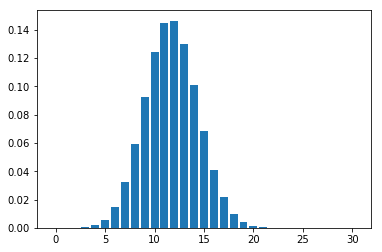

In [14]:
# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = scipy.linspace(0,30,31)
# Create the binomial distribution.
outcome_probs = stats.binom.pmf(outcome_counts,30,0.39)
plt.bar(outcome_counts, outcome_probs)
plt.show()

## 12: Cumulative Density Function

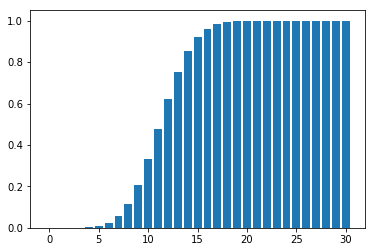

In [30]:
outcome_probs = stats.binom.cdf(outcome_counts,30,0.39)
plt.bar(outcome_counts, outcome_probs)
plt.show()

In [27]:
stats.binom.cdf(16,30,0.39)

0.96230037660548828

# Significance Testing

- if a new weight loss pill helped people lose more weight:
  - null hypothesis: patients who went on the weight loss pill lost no more weight than those who didn't.
  - alternative hypothesis: patients who went on the weight loss pill lost more weight than those who didn't.

## 2: Research Design

- Group A was given a placebo, or fake, pill and instructed to consume it on a daily basis.
- Group B was given the actual weight loss pill and instructed to consume it on a daily basis.

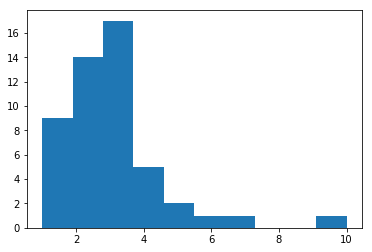

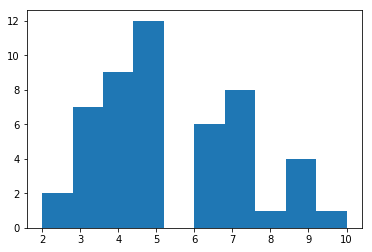

In [22]:
weight_lost = pd.read_csv("weight_loss.csv", header=None)
weight_lost_a = weight_lost[[0]]
weight_lost_b = weight_lost[[1]]
mean_group_a = np.mean(weight_lost_a)[0]
mean_group_b = np.mean(weight_lost_b)[1]

plt.hist(weight_lost_a)
plt.show()
plt.hist(weight_lost_b)
plt.show()

## 4: Test Statistic

x¯b−x¯a

Null hypothesis: x¯b−x¯a=0

Alternative hypothesis: x¯b−x¯a>0

In [23]:
mean_difference = mean_group_b - mean_group_a
print(mean_difference)

2.52


## 5: Permutation Test

The **permutation test** is a statistical test that involves simulating rerunning the study many times and recalculating the test statistic for each iteration. The goal is to calculate a distribution of the test statistics over these many iterations. This distribution is called the **sampling distribution** and it approximates the full range of possible test statistics under the null hypothesis. We can then benchmark the test statistic we observed in the data (a mean difference of `2.52`) to determine how likely it is to observe this mean difference under the null hypothesis. If the null hypothesis is true, then the observed mean difference of `2.52` should be quite common in the sampling distribution. 

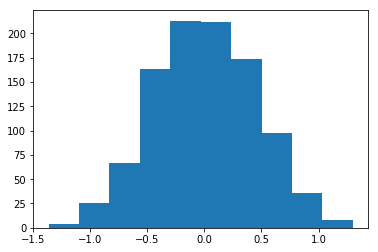

In [24]:
all_values = weight_lost[0].tolist() + weight_lost[1].tolist()
mean_differences = []
for i in range(1000):
    group_a = []
    group_b = []
    for value in all_values:
        assignment_chance = np.random.rand()
        if assignment_chance >= 0.5:
            group_a.append(value)
        else:
            group_b.append(value)
    iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
    mean_differences.append(iteration_mean_difference)
    
plt.hist(mean_differences)
plt.show()

## 6: Sampling Distribution

By creating many permutations, we're able to see all possible configurations of this error.

Now create a *dictionary* that contains the values in the sampling distribution so we can benchmark our observed test statistic against it. The keys in the *dictionary* should be the test statistic and the values should be their frequency.

## 7: Dictionary Representation Of A Distribution

To check if a key exists in a *dictionary*, we need to use the [`get()` method](https://docs.python.org/3/library/stdtypes.html#dict.get) to:

- return the value at the specified key if it exists in the dictionary or
- return another value we specify instead.

In [28]:
empty = {}
empty.get("a", False)

False

In [27]:
empty["b"] = "boat"
empty.get("b", False)

'boat'

In [30]:
empty = {"c": 1}
if empty.get("c", False):
    val = empty.get("c")
    inc = val + 1
    empty["c"] = inc
else:
    empty["c"] = 1
empty["c"]

2

In [35]:
sampling_distribution = {}
for df in mean_differences:
    if sampling_distribution.get(df, False):
        sampling_distribution[df] += 1
    else:
        sampling_distribution[df] = 1

## 8: P Value

Since the observed test statistic is not near `0`, it could mean that the weight loss pills could be responsible for the mean difference in the study.

We can now use the sampling distribution to determine the number of times a value of `2.52` or higher appeared in our simulations. If we then divide that frequency by `1000`, we'll have the probability of observing a mean difference of `2.52` or higher purely due to random chance.

This probability is called the **p value**. If this value is high, it means that the difference in the amount of weight both groups lost could have *easily* happened randomly and the weight loss pills probably didn't play a role. 

Set the **p value threshold** before conducting the study:

- if the p value is less than the threshold, we:
  - reject the null hypothesis

The most common p value threshold is 5%.

In [45]:
frequencies = []
for sp in sampling_distribution.keys():
    if sp >= 2.52:
        frequencies.append(sampling_distribution[sp])
p_value = np.sum(frequencies) / 1000
p_value

0.0

## 9: Caveats

Since the p value of `0` is less than the threshold we set of `0.05`, we conclude that the difference in weight lost can't be attributed to random chance alone. We therefore reject the null hypothesis and accept the alternative hypothesis. A few caveats:

- The p value threshold:
  - If you set too high of a p value threshold, you may accept the alternative hypothesis incorrectly and reject the null hypothesis. This is known as a [**type I error**](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors).
  - If you set too low of a p value threshold, you may reject the alternative hypothesis incorrectly in favor of accepting the null hypothesis. This is known as a [**type II error**](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors).

# Chi-squared tests

## 1: Observed And Expected Frequencies

The chi-squared test enables us to quantify the difference between sets of observed and expected categorical values.

## 3: Updating The Formula


|          | Male    | Female  | Total |
| -------- | ------- | ------- | ----- |
| Observed | 21790   | 10771   | 32561 |
| Expected | 16280.5 | 16280.5 | 32561 |

What we really want to find is one number that can tell us how much all of our observed counts deviate from all of their expected counterparts. This will let us figure out if our difference in counts is statistically significant. We can get one step closer to this by squaring the top term in our difference formula:

$\frac{(\text{observed}−\text{expected})^2}{\text{expected}}$

Squaring the difference will ensure that all the differences don't sum to zero (you can't have negative squares), giving us a non-zero number we can use to assess statistical significance.

We can calculate χ2, the chi-squared value, by adding up all of the squared differences between observed and expected values.

In [51]:
female_diff = (10771 - 16280.5) ** 2 / 16280.5
male_diff = (21790 - 16280.5) ** 2 / 16280.5
gender_chisq = female_diff + male_diff
gender_chisq

3728.950615767329

## 4: Generating A Distribution

We need a way to figure out what the chi-squared value represents. We can translate a chi-squared value into a statistical significance value using a chi-squared sampling distribution. A p-value allows us to determine whether the difference between two values is due to chance, or due to an underlying difference.

We can generate a chi-squared sampling distribution using our expected probabilities. If we repeatedly generate random samples that contain `32561`samples, and graph the chi-squared value of each sample, we'll be able to generate a distribution. 

By comparing our chi-squared value to the distribution, and seeing what percentage of the distribution is greater than our value, we'll get a p-value. For instance, if `5%` of the values in the distribution are greater than our chi-squared value, the p-value is `.05`.

(array([ 714.,  156.,   58.,   35.,   20.,   11.,    2.,    3.,    0.,    1.]),
 array([  2.50015356e-01,   8.55637553e+03,   1.71125010e+04,
          2.56686266e+04,   3.42247521e+04,   4.27808776e+04,
          5.13370031e+04,   5.98931286e+04,   6.84492541e+04,
          7.70053796e+04,   8.55615051e+04]),
 <a list of 10 Patch objects>)

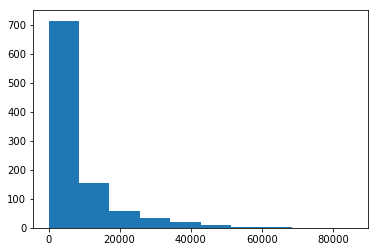

In [50]:
chi_squared_values = []
for i in range(1000):
    sequence = np.random.random((32561,)) #  a vector with 32561 elements, random numbers between 0.0 and 1.0
    sequence[sequence < .5] = 0
    sequence[sequence >= .5] = 1
    male_count = len(sequence[sequence == 0])
    female_count = len(sequence[sequence == 1])
    male_diff = (male_count - 16280.5) ** 2 / 16280.5 # Our expected values were 16280.5 Females and 16280.5 Males
    female_diff = (female_count - 16280.5) ** 2
    chi_squared = male_diff + female_diff
    chi_squared_values.append(chi_squared)
plt.hist(chi_squared_values)

## 5: Statistical Significance

The chi-squared value we calculated was `3728.95`. The highest value in the chi-squared sampling distribution was about `12`. This means that our chi-squared value is higher than `100%` of all the values in the sampling distribution, so we get a p-value of `0`. This means that there is a `0%` chance that we could get such a result randomly.

## 6: Smaller Samples

One interesting thing about chi-squared values is that they get smaller as the sample size decreases. So as sample size changes, the chi-squared value changes proportionally.

In [52]:
female_diff = (107.71 - 162.805) ** 2 / 162.805
male_diff = (217.90 - 162.805) ** 2 / 162.805
female_diff + male_diff

37.2895061576733

## 7: Sampling Distribution Equality

As sample sizes get larger, seeing large deviations from the expected probabilities gets less and less likely. The chi-squared value follows the same principle. Chi-squared values for the same sized effect increase as sample size increases, but the chance of getting a high chi-squared value decreases as the sample gets larger.

These two effects offset each other, and a chi-squared sampling distribution constructed when sampling `200` items for each iteration will look identical to one sampling `1000` items.

This enables us to easily compare any chi-squared value to a master sampling distribution to determine statistical significance, no matter what sample size the chi-squared value was created with.

(array([ 780.,  126.,   54.,   22.,    9.,    2.,    4.,    1.,    1.,    1.]),
 array([  0.        ,   1.36533333,   2.73066667,   4.096     ,
          5.46133333,   6.82666667,   8.192     ,   9.55733333,
         10.92266667,  12.288     ,  13.65333333]),
 <a list of 10 Patch objects>)

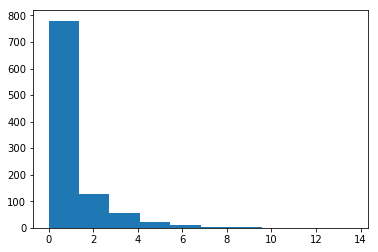

In [53]:
chi_squared_values = []
for i in range(1000):
    sequence = np.random.random((300,))
    male_count = len(sequence[sequence < .5])
    female_count = len(sequence[sequence >= .5])
    male_diff = (male_count - 150) ** 2 /150
    female_diff = (female_count - 150) ** 2 /150
    chi_squared_values.append(male_diff + female_diff)
plt.hist(chi_squared_values)

## 8: Degrees Of Freedom

A degree of freedom is the number of values that can vary without the other values being "locked in". In the case of our two categories, there is actually only one degree of freedom. 

In [54]:
diffs = []
observed = [27816, 3124, 1039, 311, 271]
expected = [26146.5, 3939.9, 944.3, 260.5, 1269.8]

for i, obs in enumerate(observed):
    exp = expected[i]
    diff = (obs - exp) ** 2 / exp
    diffs.append(diff)
    
sum(diffs)

1080.485936593381

In [55]:
observed = np.array([27816, 3124, 1039, 311, 271])
expected = np.array([26146.5, 3939.9, 944.3, 260.5, 1269.8])

chisquare_value, race_pvalue = stats.chisquare(observed, expected)
chisquare_value

1080.485936593381

## 10: Using SciPy

Rather than constructing another chi-squared sampling distribution for `4`degrees of freedom, the [scipy.stats.chisquare](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.chisquare.html) function takes in an array of observed frequences, and an array of expected frequencies, and returns a tuple containing both the chi-squared value and the matching p-value that we can use to check for statistical significance.

Here's a usage example:

```
import numpy as np
from scipy.stats import chisquare

observed = np.array([5, 10, 15])
expected = np.array([7, 11, 12])
chisquare_value, pvalue = chisquare(observed, expected)
```

The [scipy.stats.chisquare](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.chisquare.html) function returns a list, so we can assign each item in the list to a separate variable using 2 variable names separated with a comma, like you see above.